In [ ]:
import os
import json
import gzip
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pickle
import time
import gc
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###---------------------

In [ ]:
data = []
with gzip.open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/meta_Digital_Music.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

74347
{'category': [], 'tech1': '', 'description': [], 'fit': '', 'title': 'Master Collection Volume One', 'also_buy': ['B000002UEN', 'B000008LD5', 'B01J804JKE', '7474034352', 'B004ZLBTXW', 'B000008LDH', 'B000TGKXJ8', 'B0000AM6KG', 'B0001XJ372', 'B001CFLHMC', 'B0007VO57G', 'B000005KVI', 'B0000251O2', 'B07FDMZ233', 'B000008LD9', 'B000008LDL', '0006935257', 'B07BHDLHH9', 'B00004WJ8I', 'B000008LDC', 'B000008LDI', 'B000002BLF', 'B000KNOC5G', 'B00079YLZ4', 'B000002GHQ', 'B07DXQ4SY4', 'B01NAIVYTN', '0785273425', 'B000E8CM5O', 'B000008N3O', 'B0000288NN', '0439763096', 'B000A79M1G', 'B00005OACU', 'B000008LDG', 'B00000JY96', 'B0002N61QC', 'B000008LDK', 'B00004UU0Y', 'B0000275JN', 'B000008LDN', 'B000008LDP', 'B000008ORJ'], 'tech2': '', 'brand': 'John Michael Talbot', 'feature': [], 'rank': '58,291 in CDs & Vinyl (', 'also_view': ['B000002UEN', 'B000008LD5', '7474034352', 'B000008LDH', 'B004ZLBTXW', 'B0001XJ372', 'B001CFLHMC', 'B01J804JKE', 'B000008LDC', 'B000TGKXJ8', '0819815802', 'B0007VO57G', 

In [ ]:

df1 = pd.DataFrame.from_dict(data)

print(len(df1))

74347


In [ ]:
df1

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[],,Master Collection Volume One,"[B000002UEN, B000008LD5, B01J804JKE, 747403435...",,John Michael Talbot,[],"58,291 in CDs & Vinyl (","[B000002UEN, B000008LD5, 7474034352, B000008LD...","<img src=""https://images-na.ssl-images-amazon....",,,$18.99,0001377647,[],[],NaN
1,[],,[],,Hymns Collection: Hymns 1 &amp; 2,"[5558154950, B00014K5V4]",,Second Chapter of Acts,[],"93,164 in CDs & Vinyl (","[B000008KJ3, B000008KJ0, 5558154950, B000UN8KZ...","<img src=""https://images-na.ssl-images-amazon....",,,,0001529145,[],[],NaN
2,[],,[],,Early Works - Don Francisco,"[B00004RC05, B003H8F4NA, B003ZFVHPO, B003JMP1Z...",,Don Francisco,[],"875,825 in CDs & Vinyl (","[B003H8F4NA, B003ZFVHPO, B003JMP1ZK, B00004RC0...","<img src=""https://images-na.ssl-images-amazon....",,,,0001527134,[],[],NaN
3,[],,[],,So You Wanna Go Back to Egypt,"[B0000275QQ, 0001393774, 0001388312, B0016CP2G...",,Keith Green,[],"203,263 in CDs & Vinyl (","[B00000I7JO, B0016CP2GS, 0001393774, B0000275Q...","<img src=""https://images-na.ssl-images-amazon....",,,$13.01,0001388703,[],[],NaN
4,[],,[1. Losing Game 2. I Can't Wait 3. Didn't He S...,,Early Works - Dallas Holm,"[B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...",,Dallas Holm,[],"399,269 in CDs & Vinyl (","[B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...","<img src=""https://images-na.ssl-images-amazon....",,,,0001526146,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74342,[],,"[1. ""Free At Last"" Southside 1:21 2. ""Never Go...",,FUTURE PRESENTS: 56 NIGHTS,[],,FUTURE,[],"695,581 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,B01HH7D5KU,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Label:': 'FBG', 'ASIN:': 'B01HH7D5KU'}"
74343,[],,[],,Tori Amos - Little Earthquakes? - Lp Vinyl Record,[],,Tori Amos,[],"1,577,399 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,B01HHGQXI2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Original Release Date:': '2015', 'Number of ..."
74344,[],,[],,EXO - EX'ACT 3rd Album [Korean Lucky One Versi...,"[B07HSM242F, B00VMJ1MMS, B077ZYR799, B00YSOAJG...",,EXO,[],"130,165 in CDs & Vinyl (","[B07HSM242F, B01KNSVGKQ, B077ZYR799, B075D9V4W...","<img src=""https://images-na.ssl-images-amazon....",,,,B01HHRIKKK,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{'ASIN:': 'B01HHRIKKK'}
74345,[],,[],,Vanilla Fudge (Korea Edition),[],,,[],[],"[B000002IAK, B00019PDWU, B00000GX0F, B00000GX0...","<img src=""https://images-na.ssl-images-amazon....",,,,B01HI2B3G2,[],[],{'ASIN:': 'B01HI2B3G2'}


In [ ]:
np.unique(df1.category)

array([list([]), list(['Digital Music', 'Alternative Rock']),
       list(['Digital Music', 'Blues']),
       list(['Digital Music', 'Blues', 'Electric Blues Guitar']),
       list(['Digital Music', 'Broadway & Vocalists']),
       list(['Digital Music', 'Folk']), list(['Digital Music', 'Jazz']),
       list(['Digital Music', 'Miscellaneous', 'Poetry, Spoken Word & Interviews'])],
      dtype=object)

In [ ]:
len(np.unique(df1.asin))

66013

### LOADING DATA

In [ ]:
### load the data

data = []
with gzip.open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

1584082
{'overall': 5.0, 'verified': True, 'reviewTime': '12 22, 2013', 'reviewerID': 'A1ZCPG3D3HGRSS', 'asin': '0001388703', 'style': {'Format:': ' Audio CD'}, 'reviewerName': 'mark l. massey', 'reviewText': 'This is a great cd full of worship favorites!!  All time great Keith green songs. His best album by far.', 'summary': 'Great worship cd', 'unixReviewTime': 1387670400}


In [ ]:

df = pd.DataFrame.from_dict(data)

print(len(df))

1584082


In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"12 22, 2013",A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,1387670400,NaN,NaN
1,5.0,True,"09 11, 2013",AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,NaN,NaN
2,5.0,True,"03 2, 2013",A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,1362182400,NaN,NaN
3,5.0,True,"12 2, 2012",A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,1354406400,NaN,NaN
4,5.0,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1584077,5.0,True,"03 3, 2018",AR3KABMPL5L0O,B01HJ91P94,{'Format:': ' MP3 Music'},Shar Solis,Casting Crowns....you do it so well! Awesome s...,Awesome song!,1520035200,NaN,NaN
1584078,4.0,True,"01 24, 2018",A2N53GHW73INDH,B01HJ91P94,{'Format:': ' MP3 Music'},PEANUT,This band has produced many inspiring Christia...,This song in particular speaks about what it's...,1516752000,NaN,NaN
1584079,5.0,True,"04 21, 2017",ABNKLDCCVJKW1,B01HJ91P94,{'Format:': ' MP3 Music'},Alex,Awesome band and awesome song. This is my next...,Five Stars,1492732800,NaN,NaN
1584080,5.0,True,"02 23, 2018",AMWSDABZWFRAT,B01HJ91IVY,{'Format:': ' MP3 Music'},sara cabuag,Excellent,Five Stars,1519344000,NaN,NaN


In [ ]:
df[~df['vote'].isnull()]

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
4,5.0,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN
5,5.0,False,"07 8, 2009",A25ZT87OMIPLNX,0001388703,{'Format:': ' MP3 Music'},Mark the Pizza guy,"Clever,inspired and moving. This is a great al...",AWSOME,1247011200,2,NaN
7,5.0,False,"05 4, 2008",AT7OB43GHKIUA,0001388703,{'Format:': ' Audio CD'},William G. Simon,Keith Green is a bit of legend in some Christi...,"Heartfelt, Passionate and Funny - Green is Mas...",1209859200,10,NaN
17,5.0,True,"02 25, 2014",A2A3M3HVVGT9XY,0001388703,{'Format:': ' MP3 Music'},Bryan,Keith's music is a timeless message. Since hi...,Never Gets Old,1393286400,2,NaN
55,5.0,False,"09 24, 2004",A1HIDFB1RWDEJ9,0001527134,{'Format:': ' Audio CD'},Joshua L. Wilson,"Don Francisco's ""Early Works"" are filled with ...",The Early Works is filled with passion and hum...,1095984000,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1584066,5.0,False,"07 2, 2016",A3LRKLWH20WAN0,B01HJ8ZXRK,{'Format:': ' MP3 Music'},Deanna Pino,Beautifully crafted produced songs with melodi...,Just Beautiful!,1467417600,3,NaN
1584067,5.0,False,"06 30, 2016",AH7NABGKD1YCB,B01HJ8ZXRK,{'Format:': ' MP3 Music'},Kirk A Mann,Fantastic first EP from gifted singer songwrit...,Outstanding New Artist!,1467244800,3,NaN
1584068,5.0,False,"06 29, 2016",A2TA40N948Q48H,B01HJ8ZXRK,{'Format:': ' MP3 Music'},denise,I can't get Highwire out of my head! Speaks to...,Wow!,1467158400,3,NaN
1584069,5.0,True,"06 28, 2016",A16DHJS7IQX39Y,B01HJ8ZXRK,{'Format:': ' MP3 Music'},Bryan Ashmore,Shelby Figueroa is a welcome breath of fresh a...,Highwire is a beautiful snapshot of a woman fi...,1467072000,4,NaN


In [ ]:
np.unique(df[~df['vote'].isnull()]['vote'])

array(['1,074', '1,143', '10', '100', '101', '102', '103', '104', '105',
       '106', '107', '108', '109', '11', '110', '111', '112', '113',
       '114', '115', '116', '117', '118', '119', '12', '120', '121',
       '122', '124', '125', '127', '128', '129', '13', '130', '131',
       '133', '134', '135', '136', '137', '138', '139', '14', '140',
       '141', '142', '143', '144', '145', '146', '148', '149', '15',
       '150', '152', '153', '155', '158', '159', '16', '163', '164',
       '165', '166', '167', '168', '169', '17', '170', '172', '173',
       '174', '175', '176', '177', '18', '180', '181', '182', '184',
       '187', '188', '19', '190', '191', '193', '194', '195', '2', '20',
       '203', '206', '208', '21', '210', '212', '213', '219', '22', '221',
       '222', '224', '23', '230', '232', '235', '238', '24', '242', '243',
       '246', '25', '250', '26', '264', '268', '27', '271', '274', '278',
       '28', '281', '29', '290', '291', '294', '3', '30', '304', '31',
       

In [ ]:
sent = []
for i in range(10):
  # i = 2
  sent.extend(sent_tokenize(df.iloc[i]['reviewText']))
  # print( ,'\n', df.iloc[i]['summary'], '\n')

### Testing word2vec

In [ ]:
sent

['This is a great cd full of worship favorites!!',
 'All time great Keith green songs.',
 'His best album by far.',
 'So creative!',
 'Love his music - the words, the message!',
 'Some of my favorite songs on this CD.',
 'I should have bought it years ago!',
 'Keith Green, gone far to early in his carreer, left us with these few golden alblums to bless us and let us see from a more in sync world veiw or I should say "the language of the modern world\'.',
 'Had this on LP all His alblums..look for ammples and then you will wee what I am talking about.',
 'God Bless you all',
 'Keith Green had his special comedy style of Chirstian music with a powerful message.',
 'Came quickly and packaged well.',
 'I would purchase from this vendor again.',
 'Keith Green / So you wanna go back to Egypt...:  In this album Keith gets his serious messages across with some of the best examples of his wonderful humor.',
 'Bob Dylan plays harmonica on this album.',
 'Five Stars',
 'Clever,inspired and moving

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

PP_arr = []

for s in sent:
  temp = []
  temp.extend(tokenizer.tokenize(s))
  temp = [w.lower() for w in temp if not w.lower() in stop_words]
  temp = [lemmatizer.lemmatize(w) for w in temp]
  PP_arr.append(temp)

In [ ]:
model = Word2Vec(sentences=PP_arr, min_count=1,vector_size= 100,workers=3, window =3, sg = 1)

In [ ]:
len(model.wv.key_to_index)

201

In [ ]:
model.wv.vector_size

100

In [ ]:
model.wv.get_vector('keith')

array([-0.00878339,  0.00370244,  0.00516933,  0.00593875,  0.00760758,
       -0.00631991,  0.00120201,  0.00641368, -0.00302946, -0.0061395 ,
       -0.0005031 , -0.00869539, -0.0056078 ,  0.00726684,  0.00326942,
        0.00718767,  0.00684763,  0.00749984, -0.00384475, -0.00077295,
        0.002309  , -0.00455721,  0.00828489, -0.00993427,  0.00676302,
        0.00299947, -0.00488945,  0.00419858, -0.0017878 ,  0.00673342,
        0.01004935, -0.00436382, -0.00057809, -0.00575709,  0.00373877,
        0.00306023,  0.00703918,  0.00606364,  0.00960239,  0.00904022,
        0.00782684, -0.00727508, -0.00922873, -0.00026934, -0.00298003,
        0.0079274 ,  0.00581413, -0.00156876,  0.00161698,  0.00184921,
        0.00805661, -0.00960592, -0.0001301 ,  0.00342063, -0.00102187,
        0.00839814,  0.0090322 ,  0.00637638, -0.00097945,  0.00787527,
       -0.00869797,  0.00335165, -0.00462982, -0.00531328,  0.00345382,
        0.00541218,  0.00791588, -0.00543701,  0.00735258,  0.00

In [ ]:
model.wv.save_word2vec_format('/content/drive/MyDrive/data_for_lab/RS_final_assignment/tes_100d.txt')

In [ ]:
model.save("/content/drive/MyDrive/data_for_lab/RS_final_assignment/w2v_test.model")

In [ ]:
test_pretrained = Word2Vec.load("/content/drive/MyDrive/data_for_lab/RS_final_assignment/w2v_test.model")

In [ ]:
test_pretrained.wv.most_similar('keith')

[('vogue', 0.2212226837873459),
 ('christ', 0.1923919916152954),
 ('love', 0.19202546775341034),
 ('quickly', 0.18620213866233826),
 ('individual', 0.18545183539390564),
 ('good', 0.18464861810207367),
 ('powerful', 0.18275900185108185),
 ('two', 0.17938099801540375),
 ('undeniable', 0.17440244555473328),
 ('pastor', 0.1715625524520874)]

### ----------------------------------------

### Creating Word2Vec model for the whole data

In [ ]:
### Loading the data
data = []
with gzip.open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))


In [ ]:
df = pd.DataFrame.from_dict(data)

In [ ]:
df.shape

(1584082, 12)

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

unique_words = []

count, per = 0, 0
x = time.time()
for i in range(df.shape[0]):
  count += 1
  try:
    if count == df.shape[0] // 100:
      per += 1
      count = 0
      print(f'Completed {per}%... Time taken - {time.time() - x}... Remaining time - {(100 - per) * (time.time() - x)}')
      x = time.time()

    sents = sent_tokenize(df.iloc[i]['reviewText'])
    
    temp = []
    for s in sents:
      temp.extend(tokenizer.tokenize(s))
      temp = [w.lower() for w in temp if not w.lower() in stop_words]
      temp = [lemmatizer.lemmatize(w) for w in temp]

    for j in temp:
      unique_words.append(j)
  except KeyboardInterrupt:
    break
  except:
    pass

Completed 1%... Time taken - 23.23643183708191... Remaining time - 2300.408380508423
Completed 2%... Time taken - 14.838775634765625... Remaining time - 1454.2007131576538
Completed 3%... Time taken - 13.652883291244507... Remaining time - 1324.330465555191
Completed 4%... Time taken - 14.831535816192627... Remaining time - 1423.8300247192383
Completed 5%... Time taken - 6.1536455154418945... Remaining time - 584.5969355106354
Completed 6%... Time taken - 17.098019123077393... Remaining time - 1607.2146492004395
Completed 7%... Time taken - 12.786045789718628... Remaining time - 1189.103101015091
Completed 8%... Time taken - 14.19383430480957... Remaining time - 1305.8335676193237
Completed 9%... Time taken - 7.775974988937378... Remaining time - 707.6143097877502
Completed 10%... Time taken - 16.514530181884766... Remaining time - 1486.3083386421204
Completed 11%... Time taken - 17.599754571914673... Remaining time - 1566.3788571357727
Completed 12%... Time taken - 19.3706693649292...

In [ ]:
len(unique_words)

32706650

In [ ]:
word_freq = Counter(unique_words)

In [ ]:
# with open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/word_frequency.pickle', 'wb') as handle:
#     pickle.dump(dict(word_freq), handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

### ------------------------------------

In [ ]:
### loading frequency dict
with open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/word_frequency.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
# taking words which is repeated more than 10 times and less than 25000 times. 
# Also filtering words of length 1 and 2 and numbers.
word_set = set()
for k in b.keys():
  if not (b[k] < 10 or b[k] > 25000 or len(k) <= 2 or k.isnumeric()):
    word_set.add(k)    

In [ ]:
len(word_set)

48916

In [ ]:
gc.collect()

0

In [ ]:
### Loading the data
data = []
with gzip.open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

df = pd.DataFrame.from_dict(data)

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

PP_arr = []
count, per = 0, 0
x = time.time()
for i in range(df.shape[0]):
  count += 1
  try:
    if count == df.shape[0] // 100:
      per += 1
      count = 0
      print(f'Completed {per}%... Time taken - {time.time() - x}... Remaining time - {(100 - per) * (time.time() - x)}')
      x = time.time()

    sent = sent_tokenize(df.iloc[i]['reviewText'])
    for s in sent:
      temp = []
      temp.extend(tokenizer.tokenize(s))
      temp = [w.lower() for w in temp if not w.lower() in stop_words]
      temp = [lemmatizer.lemmatize(w) for w in temp]
      temp = [w for w in temp if w in word_set]
      if len(temp) > 1:
        PP_arr.append(temp)
    
  except KeyboardInterrupt:
    break
  except  Exception as e: 
    pass

Completed 1%... Time taken - 10.175477027893066... Remaining time - 1007.3729574680328
Completed 2%... Time taken - 9.333108901977539... Remaining time - 914.6453266143799
Completed 3%... Time taken - 5.5299458503723145... Remaining time - 536.4056725502014
Completed 4%... Time taken - 7.22456955909729... Remaining time - 693.5592956542969
Completed 5%... Time taken - 4.332571983337402... Remaining time - 411.59497261047363
Completed 6%... Time taken - 7.865701675415039... Remaining time - 739.3764953613281
Completed 7%... Time taken - 5.551400423049927... Remaining time - 516.2808601856232
Completed 8%... Time taken - 6.935157537460327... Remaining time - 638.0352611541748
Completed 9%... Time taken - 4.691027641296387... Remaining time - 426.88403606414795
Completed 10%... Time taken - 6.400962591171265... Remaining time - 576.0873627662659
Completed 11%... Time taken - 7.930602550506592... Remaining time - 705.824857711792
Completed 12%... Time taken - 6.342750072479248... Remaining

In [ ]:
model = Word2Vec(sentences=PP_arr, min_count=1,vector_size= 100,workers=3, window =3, sg = 1)

In [ ]:
# model.save("/content/drive/MyDrive/data_for_lab/RS_final_assignment/w2v_v2.model")

In [ ]:
len(model.wv.key_to_index), model.wv.vector_size

(48907, 100)

In [ ]:
model.wv.get_vector('keith')

array([ 0.10385427,  0.04052361, -0.4721479 , -0.28519624, -0.15270838,
       -0.26334813, -0.35240933,  0.49180388, -0.31079724, -0.56329715,
       -0.18978435,  0.07454391, -0.44058344,  0.24287134,  0.1729744 ,
        0.45110312, -0.46091434, -0.11843729,  0.21795888, -0.59076196,
       -0.04756524,  0.74114007,  0.47006565,  1.0022998 , -0.5411253 ,
        0.5632353 ,  0.20228745, -0.4373214 ,  0.04167503, -0.26078096,
        0.04677122, -0.24626993, -0.34077734, -0.04558436, -0.3108025 ,
       -0.02686865,  0.6385238 , -0.3658184 , -0.38156888, -0.22560513,
       -0.24669933,  0.2667196 , -0.29662457, -0.3077548 ,  0.44419992,
        0.3961391 , -0.3858814 , -0.60807765, -0.03008805, -0.16054322,
        0.35970134, -0.20460895, -0.4470787 , -0.35316473,  0.2551988 ,
        0.21488197, -0.09982389,  0.7716023 , -0.13625675,  0.08441096,
        0.51247466, -0.1950659 , -0.12169358,  0.30684763, -0.25527707,
        0.4433967 ,  0.0584562 , -0.01326058, -0.08489585,  0.31

In [ ]:
model.wv.most_similar('keith')

[('kieth', 0.8159852027893066),
 ('harkin', 0.7378796339035034),
 ('kristyn', 0.7055225968360901),
 ('merrow', 0.6943685412406921),
 ('sudano', 0.6856597065925598),
 ('keiths', 0.6825425624847412),
 ('carradine', 0.6808328032493591),
 ('octagon', 0.679654061794281),
 ('wonderboy', 0.6698768734931946),
 ('toby', 0.6476283073425293)]

### Visualizing word2vec embaddings


In [ ]:
# load model
model = Word2Vec.load("/content/drive/MyDrive/data_for_lab/RS_final_assignment/w2v_v1.model")

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index.keys():
        tokens.append(model.wv.get_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens)[:50])

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12)) 
    for i in range(len(x)):
      plt.scatter(x[i],y[i])
      plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.show()

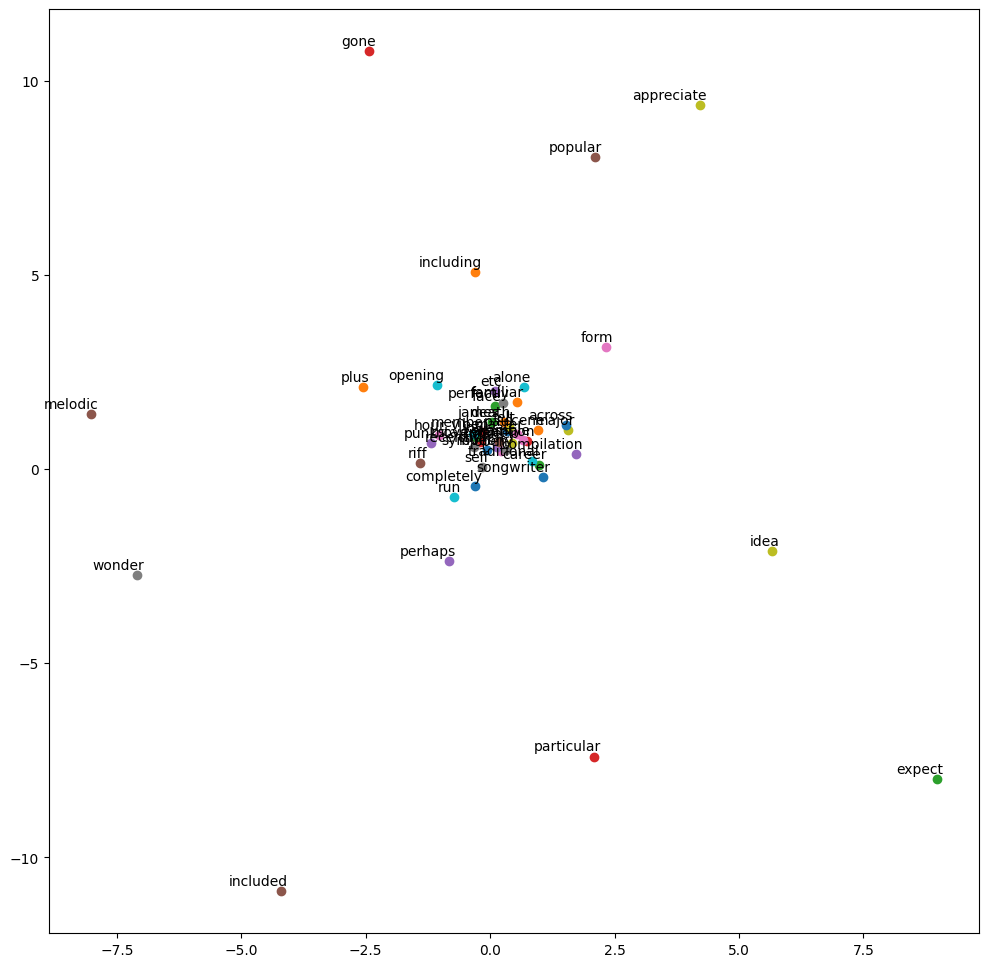

In [ ]:
tsne_plot(model)

### Expressing all items as vectors using word2vec model

In [ ]:
# load model
model = Word2Vec.load("/content/drive/MyDrive/data_for_lab/RS_final_assignment/w2v_v2.model")

In [ ]:
### Loading the data
data = []
with gzip.open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

df = pd.DataFrame.from_dict(data)
df.shape

(1584082, 12)

In [ ]:
len(np.unique(df['asin']))

456992

In [ ]:
### loading frequency dict
with open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/word_frequency.pickle', 'rb') as handle:
    b = pickle.load(handle)

# w2v_v1
# taking words which is repeated more than 10 times and less than 10000 times. 
# Also filtering words of length 1 and 2 and numbers.

# w2v_v2
# taking words which is repeated more than 10 times and less than 25000 times. 
# Also filtering words of length 1 and 2 and numbers.

word_set = set()

for k in b.keys():
  if not (b[k] < 10 or b[k] > 25000 or len(k) <= 2 or k.isnumeric()):
    word_set.add(k)     

In [ ]:
len(word_set)

48916

In [ ]:
unique_items = list(np.unique(df['asin']))

In [ ]:
len(unique_items)

456992

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

check, per, check_t = 0, 0, []
main_dict = {}
x = time.time()
for item in df.groupby('asin'):
  try:
    check += 1

    if check == len(unique_items) // 100:
        per += 1
        check = 0
        check_t.append(time.time() - x)
        print(f'Completed {per}%... Time taken - {time.time() - x}... Remaining time - {(100 - per) * (sum(check_t) / len(check_t))}')
        x = time.time()


    temp_df = item[1]
    item_vec = np.zeros(100)
    count = 0 
    for i in range(temp_df.shape[0]):
      sent = sent_tokenize(temp_df.iloc[i]['reviewText'])
      pos_rev = True if temp_df.iloc[i]['overall'] >= 3 else False
      for s in sent:
        temp = []
        temp.extend(tokenizer.tokenize(s))
        temp = [w.lower() for w in temp if not w.lower() in stop_words]
        temp = [lemmatizer.lemmatize(w) for w in temp]
        temp = [w for w in temp if w in word_set]

        if pos_rev:  
          for w in temp:
            item_vec += model.wv.get_vector(w)
            count += 1
        else:
          for w in temp:
            item_vec -= model.wv.get_vector(w)
            count += 1

    if count != 0:
      main_dict[item[0]] = item_vec/count

  except KeyboardInterrupt:
    break
  except Exception as e:
    pass




Completed 1%... Time taken - 16.772717475891113... Remaining time - 1660.4985580444336
Completed 2%... Time taken - 8.917238235473633... Remaining time - 1258.8074560165405
Completed 3%... Time taken - 11.996544599533081... Remaining time - 1218.5298375288644
Completed 4%... Time taken - 10.276072263717651... Remaining time - 1151.1014213562012
Completed 5%... Time taken - 7.5489397048950195... Remaining time - 1054.7184207439423
Completed 6%... Time taken - 5.808228254318237... Remaining time - 960.675617535909
Completed 7%... Time taken - 6.246271133422852... Remaining time - 897.6624128477913
Completed 8%... Time taken - 6.7804789543151855... Remaining time - 854.9843240976334
Completed 9%... Time taken - 7.493770122528076... Remaining time - 827.4956587685479
Completed 10%... Time taken - 7.522510766983032... Remaining time - 804.2646367549897
Completed 11%... Time taken - 9.350556135177612... Remaining time - 798.6802610484036
Completed 12%... Time taken - 10.466935634613037... Re

In [ ]:
arr = []
items = []
for i in main_dict.keys():
  arr.append(main_dict[i])
  items.append(i)

arr = np.array(arr)
items = np.array(items)

In [ ]:
len(unique_items) - items.shape[0]

44543

In [ ]:
# saving item vectors
# with open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/item_vectors_v2.pickle', 'wb') as handle:
#     pickle.dump(main_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Building Content based RS

In [ ]:
# load item vectors
# item_vectors_v2 has more items then item_vectors
with open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/item_vectors_v2.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
arr = []
items = []
for i in b.keys():
  arr.append(b[i])
  items.append(i)

arr = np.array(arr)
items = np.array(items)

In [ ]:
arr.shape

(412449, 100)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music_small.csv', header = None)

In [ ]:
x = time.time()
test_user = 'A12R54MKO17TW0'

t = df[df[1] == test_user]
pos_rev = t[t[2] >= 3]
neg_rev = t[t[2] < 3]

pos_items_interacted = list(pos_rev[0])
neg_items_interacted = list(neg_rev[0])

user_profile = np.zeros(100)
arg_items = np.where(np.isin(items,pos_items_interacted))[0]
user_profile += np.sum(arr[arg_items], axis = 0)
arg_items = np.where(np.isin(items,neg_items_interacted))[0]
user_profile -= np.sum(arr[arg_items], axis = 0)
user_profile = user_profile / (len(pos_items_interacted) + len(neg_items_interacted))

top_k = 10
print(items[np.argsort(np.sqrt(np.sum(np.square(arr - user_profile), axis = 1)))[:top_k]])
print(f'Recommendations in {time.time() - x} seconds')

['B001NFURF4' 'B0000564WK' 'B00025G1H4' 'B001BIQPB8' 'B01AUA24UI'
 'B001DCDZVA' 'B001NSC6UK' 'B00000JWON' 'B01DKYRCEY' 'B002UXK0Z0']
Recommendations in 0.9253556728363037 seconds


### Collaborative

In [ ]:
x = pd.read_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music_small.csv', header = None)

In [ ]:
x.head()

,0,1,2,3
0,0001388703,A1ZCPG3D3HGRSS,5.0,1387670400
1,0001388703,AC2PL52NKPL29,5.0,1378857600
2,0001388703,A1SUZXBDZSDQ3A,5.0,1362182400
3,0001388703,A3A0W7FZXM0IZW,5.0,1354406400
4,0001388703,A12R54MKO17TW0,5.0,1325894400


In [ ]:
len(np.unique(x.iloc[:,0])), len(np.unique(x.iloc[:,1]))

(456992, 840372)

In [ ]:
user_dict = {x:i for i,x in enumerate(np.unique(x.iloc[:,1]))}
item_dict = {x:i for i,x in enumerate(np.unique(x.iloc[:,0]))}

In [ ]:
class MF_wo_implicit():
  def __init__(self, arr, k, lmda4, gamma, iter):
    self.arr = arr

    self.user_dict = {x:i for i,x in enumerate(np.unique(arr[:,1]))}
    self.item_dict = {x:i for i,x in enumerate(np.unique(arr[:,0]))}

    self.bu = np.random.rand(len(self.user_dict))
    self.bi = np.random.rand(len(self.item_dict))
    self.u = np.mean(arr[:,2])
    self.p = np.random.rand(len(self.user_dict),k)
    self.q = np.random.rand(k,len(self.item_dict))

    self.k = k
    self.lmda4 = lmda4
    self.gamma = gamma
    self.iter = iter


  def fit(self):
    for epoch in range(self.iter):
      total,count,err = self.arr.shape[0], 1, []
    
      for i in range(self.arr.shape[0]):
        curr_rating = self.arr[i]
        r_hat = self.u + self.bu[self.user_dict[curr_rating[1]]] + self.bi[self.item_dict[curr_rating[0]]] + np.dot(self.p[self.user_dict[curr_rating[1]],:], self.q[:, self.item_dict[curr_rating[0]]])

        # update
        error = curr_rating[2] - r_hat
        err.append(error)

        self.bu[self.user_dict[curr_rating[1]]] += self.gamma * (error - self.lmda4 * self.bu[self.user_dict[curr_rating[1]]])
        self.bi[self.item_dict[curr_rating[0]]] += self.gamma * (error - self.lmda4 * self.bi[self.item_dict[curr_rating[0]]])

        for j in range(self.k):
          self.p[self.user_dict[curr_rating[1]],j] += self.gamma * (error * self.q[j, self.item_dict[curr_rating[0]]] + self.lmda4 * self.p[self.user_dict[curr_rating[1]],j])
          self.q[j, self.item_dict[curr_rating[0]]] += self.gamma * (error * self.p[self.user_dict[curr_rating[1]],j] + self.lmda4 * self.q[j, self.item_dict[curr_rating[0]]])
        
        if count % int(total / 10) == 0:
          s = 'Epoch ' + str(epoch) + ' [' + '===' * int((count+1) / total * 10) + '>' + '   ' * (10 - int((count+1) / total * 10)) + ']' + '  Error (RMSE): ' + str(np.sqrt(abs(np.mean(err))))
          print(f"\r{s}", end="")
        
        count += 1
      print()

  def predict_index(self, user_id, top_k):
    rec_index, ret_list = [], []

    temp1 = self.arr[self.arr[1] == user_id][0]
    for i in range(self.arr.shape[1]):
      r_hat = self.u + self.bu[self.user_dict[user_id]] + self.bi[i] + np.dot(self.p[self.user_dict[user_id],:], self.q[:,i])

      rec_index.append(r_hat)

    rev_sorted_index = np.argsort(rec_index)[::-1]

    for i in rev_sorted_index:
      if i not in temp1:
        ret_list.append(i)

      if len(ret_list) == top_k:
        break
    
    return ret_list

In [ ]:
mf = MF_wo_implicit(np.array(x),200,0.002,0.005,10)

In [ ]:
mf.fit()

Epoch 0 [===========================>   ]  Error (RMSE): 4.428360844003845
Epoch 1 [===========================>   ]  Error (RMSE): 2.097266123265976
Epoch 2 [===========================>   ]  Error (RMSE): 1.3424272965411346
Epoch 3 [===========================>   ]  Error (RMSE): 0.8884169437278764
Epoch 4 [===========================>   ]  Error (RMSE): 0.5857080230833032
Epoch 5 [===========================>   ]  Error (RMSE): 0.3723102528713322
Epoch 6 [===========================>   ]  Error (RMSE): 0.21170856024823034
Epoch 7 [===========================>   ]  Error (RMSE): 0.05617495197815595
Epoch 8 [===========================>   ]  Error (RMSE): 0.11743460810300253
Epoch 9 [===========================>   ]  Error (RMSE): 0.13847946727719151


In [ ]:
save_dict = {}

save_dict['info'] = f'Matrix Factorization model.\nUsed data array of size {mf.arr.shape}, with columns as [item_id, user_id, rating].\nOther data includes:\nk = {mf.k}\nlmda4: {mf.lmda4}\ngamma: {mf.gamma}\niterations: {mf.iter}'
save_dict['arr'] = mf.arr
save_dict['user_dict'] = mf.user_dict
save_dict['item_dict'] = mf.item_dict
save_dict['bu'] = mf.bu
save_dict['bi'] = mf.bi
save_dict['u'] = mf.u
save_dict['p'] = mf.p
save_dict['q'] = mf.q


In [ ]:
len(save_dict['item_dict'])

456992

In [ ]:
save_dict['p'].shape, len(save_dict['user_dict'])

((840372, 200), 840372)

In [ ]:
# with open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/matrix_factorization_model_v1.pickle', 'wb') as handle:
    # pickle.dump(save_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
with open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/matrix_factorization_model_v1.pickle', 'wb') as handle:
    b = pickle.load(save_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Checking metadata file

In [ ]:
remove = set(['Clothing, Shoes & Jewelry',
 'Handbags & Wallets',
 'Home & Kitchen', 'Kitchen & Dining',
 'Books','CDs & Vinyl',
 'Electronics',
 'Kindle Store',
 'Sports & Outdoors',
 'Office Products',
 'Patio, Lawn & Garden'])


line_count = 10535680

In [ ]:
data = []
check = 0
with gzip.open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/All_Amazon_Meta.json.gz') as f:
    for l in f:
      check += 1
      if check <= line_count:
        pass
      else:
        line_count += 1
      found = False
      t = json.loads(l.strip())['category']
      if t:
        for i in t:
          if i in remove:
            found = True
            break
        
        if found:
          pass
        else:
          print(json.loads(l.strip())['category'])
          print(json.loads(l.strip()))
          break
    


['Patio, Lawn & Garden', 'Outdoor Power Tools', 'Replacement Parts & Accessories', 'Lawn Mower Parts & Accessories']
{'category': ['Patio, Lawn & Garden', 'Outdoor Power Tools', 'Replacement Parts & Accessories', 'Lawn Mower Parts & Accessories'], 'tech1': ' class="a-keyvalue prodDetTable" role="presentation">\n         \n           \n           \n           \n           <tr>\n            \n            \n              \n              \n               \n                <th class="a-color-secondary a-size-base prodDetSectionEntry">\n                  Brand Name\n                </th>\n                \n              \n            \n            \n           \n            <td class="a-size-base">\n              Scholastic\n            </td>\n            \n           </tr>\n           \n           \n           \n           <tr>\n            \n            \n              \n              \n               \n                <th class="a-color-secondary a-size-base prodDetSectionEntry">\n       

In [ ]:
line_count

10535680

In [ ]:
json.loads(l.strip())['category']

[]

In [ ]:
line_count

6920378

In [ ]:
x = pd.read_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music_small.csv', header = None)

In [ ]:
set_id = set(x.iloc[:,0])

In [ ]:
'B0013BM5T4' in set_id

True

In [ ]:
data = []
check = 0
after_c = 0
remove = set(['Digital Music'])
with gzip.open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/All_Amazon_Meta.json.gz') as f:
    for l in f:
      check += 1
      # if check < 14788659 - 10:
      #   continue
      
      t = json.loads(l.strip())

      if t['asin'] in set_id:
        data.append(t)

        # if after_c > 200000:
        #   if input() == 'q':
        #     break
        #   else:
        #     print(len(data))
        #     after_c = 0


In [ ]:
df = pd.DataFrame.from_dict(data)

In [ ]:
df

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,[],,[],,Master Collection Volume One,"[B000002UEN, B000008LD5, B01J804JKE, 747403435...",[],,John Michael Talbot,[],"58,291 in CDs & Vinyl (","[B000002UEN, B000008LD5, 7474034352, B000008LD...","<img src=""https://images-na.ssl-images-amazon....",,,$18.99,0001377647,NaN
1,[],,[],,Hymns Collection: Hymns 1 &amp; 2,"[5558154950, B00014K5V4]",[],,Second Chapter of Acts,[],"93,164 in CDs & Vinyl (","[B000008KJ3, B000008KJ0, 5558154950, B000UN8KZ...","<img src=""https://images-na.ssl-images-amazon....",,,,0001529145,NaN
2,[],,[],,Early Works - Don Francisco,"[B00004RC05, B003H8F4NA, B003ZFVHPO, B003JMP1Z...",[],,Don Francisco,[],"875,825 in CDs & Vinyl (","[B003H8F4NA, B003ZFVHPO, B003JMP1ZK, B00004RC0...","<img src=""https://images-na.ssl-images-amazon....",,,,0001527134,NaN
3,[],,[],,So You Wanna Go Back to Egypt,"[B0000275QQ, 0001393774, 0001388312, B0016CP2G...",[],,Keith Green,[],"203,263 in CDs & Vinyl (","[B00000I7JO, B0016CP2GS, 0001393774, B0000275Q...","<img src=""https://images-na.ssl-images-amazon....",,,$13.01,0001388703,NaN
4,[],,[1. Losing Game 2. I Can't Wait 3. Didn't He S...,,Early Works - Dallas Holm,"[B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...",[],,Dallas Holm,[],"399,269 in CDs & Vinyl (","[B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...","<img src=""https://images-na.ssl-images-amazon....",,,,0001526146,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74337,[],,"[1. ""Free At Last"" Southside 1:21 2. ""Never Go...",,FUTURE PRESENTS: 56 NIGHTS,[],[https://images-na.ssl-images-amazon.com/image...,,FUTURE,[],"695,581 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,B01HH7D5KU,"{'Label:': 'FBG', 'ASIN:': 'B01HH7D5KU'}"
74338,[],,[],,Tori Amos - Little Earthquakes? - Lp Vinyl Record,[],[https://images-na.ssl-images-amazon.com/image...,,Tori Amos,[],"1,577,399 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,B01HHGQXI2,"{'Original Release Date:': '2015', 'Number of ..."
74339,[],,[],,EXO - EX'ACT 3rd Album [Korean Lucky One Versi...,"[B07HSM242F, B00VMJ1MMS, B077ZYR799, B00YSOAJG...",[https://images-na.ssl-images-amazon.com/image...,,EXO,[],"130,165 in CDs & Vinyl (","[B07HSM242F, B01KNSVGKQ, B077ZYR799, B075D9V4W...","<img src=""https://images-na.ssl-images-amazon....",,,,B01HHRIKKK,{'ASIN:': 'B01HHRIKKK'}
74340,[],,[],,Vanilla Fudge (Korea Edition),[],[],,,[],[],"[B000002IAK, B00019PDWU, B00000GX0F, B00000GX0...","<img src=""https://images-na.ssl-images-amazon....",,,,B01HI2B3G2,{'ASIN:': 'B01HI2B3G2'}


In [ ]:
ids = df['asin']

In [ ]:
data_n = []
with gzip.open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/meta_Digital_Music.json.gz') as f:
    for l in f:
        data_n.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
# print(len(data))

df2 = pd.DataFrame.from_dict(data_n)
ids_n = df2['asin']

In [ ]:
len(set(ids).union(set(ids_n)))

66013

In [ ]:
'B0002V55KM' in ids_n

False

In [ ]:
final_df = pd.DataFrame()
ids_n = set(ids_n)
ids = set(ids)
c = 0
for i in ids:
  if i not in ids_n:
    c += 1

c

0

In [ ]:
'0001388703' in df2['asin']

False

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music_small.csv', header = None)

In [ ]:
k = 0

for i in np.unique(df3.iloc[:,0]):
  if i not in ids_n:
    print(i)
    k += 1
    
  if k > 10:
    break

6305298564
9081101811
9434682614
9568355790
9721717150
9746784129
B000005YIR
B000006TEB
B000009G3H
B00000AYII
B0000255NS


In [ ]:
len(np.unique(df3.iloc[:,0]))

456992

In [ ]:
np.unique(df3.iloc[:,0])[100] in ids_n

True

In [ ]:
len(ids_n)

66013

amazon.com/dp/id

### Learning To Rank

In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRanker
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/Digital_Music_small.csv', header = None)

In [ ]:
ratings.columns = ['itemId', 'userId', 'rating', 'timestamp']

In [ ]:
columns_titles = ["userId","itemId", 'rating', 'timestamp']
ratings=ratings.reindex(columns=columns_titles)

In [ ]:
ratings

,userId,itemId,rating,timestamp
0,A1ZCPG3D3HGRSS,0001388703,5.0,1387670400
1,AC2PL52NKPL29,0001388703,5.0,1378857600
2,A1SUZXBDZSDQ3A,0001388703,5.0,1362182400
3,A3A0W7FZXM0IZW,0001388703,5.0,1354406400
4,A12R54MKO17TW0,0001388703,5.0,1325894400
...,...,...,...,...
1584077,AR3KABMPL5L0O,B01HJ91P94,5.0,1520035200
1584078,A2N53GHW73INDH,B01HJ91P94,4.0,1516752000
1584079,ABNKLDCCVJKW1,B01HJ91P94,5.0,1492732800
1584080,AMWSDABZWFRAT,B01HJ91IVY,5.0,1519344000


In [ ]:
# Copied from bturan19's kaggle nb.
def get_feature_by_user(df):
    res = list()
    for i, v in tqdm(df.groupby('userId')):
        res.append(
            (
                i,
                len(v['itemId']),
                (v['rating'] == 5).sum(),
                (v['rating'] == 4).sum(),
                (v['rating'] == 3).sum(),
                (v['rating'] == 2).sum(),
                (v['rating'] == 1).sum(),
                (v['timestamp'].dt.dayofweek == 0).sum(),
                (v['timestamp'].dt.dayofweek == 1).sum(),
                (v['timestamp'].dt.dayofweek == 2).sum(),
                (v['timestamp'].dt.dayofweek == 3).sum(),
                (v['timestamp'].dt.dayofweek == 4).sum(),
                (v['timestamp'].dt.dayofweek == 5).sum(),
                (v['timestamp'].dt.dayofweek == 6).sum(),
                (v['timestamp'].dt.hour > 17).sum()

            )
        )
    
    res = pd.DataFrame(
        res,
        columns=[
            'userId', 'revired_products', '5_star_ratings_gave', '4_star_ratings_gave',
            '3_star_ratings_gave', '2_star_ratings_gave', '1_star_ratings_gave',
            'monday_review_count_user', 'tuesday_review_count_user', 'wednesday_review_count_user', 'thursday_review_count_user',
            'friday_review_count_user', 'saturday_review_count_user', 'sunday_review_count_user','evening_reviews_by_user'
        ])
    return res
   
def get_feature_by_product(df):
    res = list()
    for i, v in tqdm(df.groupby('itemId')):
        res.append(
            (
                i,
                len(v['userId']),
                (v['rating'] == 5).sum(),
                (v['rating'] == 4).sum(),
                (v['rating'] == 3).sum(),
                (v['rating'] == 2).sum(),
                (v['rating'] == 1).sum(),
                (v['timestamp'].dt.dayofweek == 0).sum(),
                (v['timestamp'].dt.dayofweek == 1).sum(),
                (v['timestamp'].dt.dayofweek == 2).sum(),
                (v['timestamp'].dt.dayofweek == 3).sum(),
                (v['timestamp'].dt.dayofweek == 4).sum(),
                (v['timestamp'].dt.dayofweek == 5).sum(),
                (v['timestamp'].dt.dayofweek == 6).sum(),
                (v['timestamp'].dt.hour > 17).sum()
            )
        )
    
    res = pd.DataFrame(
        res,
        columns=[
            'itemId', 'user_count', '1_star_ratings_recieved', '2_star_ratings_recieved',
            '3_star_ratings_recieved', '4_star_ratings_recieved', '5_star_ratings_recieved',
            'monday_review_count_item', 'tuesday_review_count_item', 'wednesday_review_count_item', 'thursday_review_count_item',
            'friday_review_count_item', 'saturday_review_count_item', 'sunday_review_count_item','evening_reviews_by_movie'
        ])
    return res


In [ ]:
with open('/content/drive/MyDrive/data_for_lab/RS_final_assignment/item_vectors_v2.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
def get_feature_by_user_v1(df):
    res = list()
    for i, v in tqdm(df.groupby('userId')):
        vec = np.zeros(100)
        item, item_rating = v['itemId'], v['rating']
        count = 0
        for item_, irat in zip(item,item_rating):
          try:
            if irat >= 3:
              vec += b[item_]
            else:
              vec -= b[item_]
            count += 1
          except:
            pass

        if count != 0:
          vec = vec / count
          res.append(
              [i] + list(vec)
          )
    
    col_names = ['userId'] + [f'{m}' for m in range(100)]
    res = pd.DataFrame(
        res,
        columns=col_names)
    return res


def get_feature_by_product_v1(df):
    res = list()
    for i, v in tqdm(df.groupby('itemId')):
        try:
          res.append(
              [i] + list(b[i])
          )
        except:
          pass
    
    col_names = ['itemId'] + [f'{m}' for m in range(100)]
    res = pd.DataFrame(
        res,
        columns= col_names)
    return res


In [ ]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])

In [ ]:
train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state = 42)

In [ ]:
train_x_u = get_feature_by_user_v1(train_ratings)
train_x_p = get_feature_by_product_v1(train_ratings)

100%|██████████| 395369/395369 [00:17<00:00, 22058.16it/s]


In [ ]:
train_x_u = get_feature_by_user(ratings.iloc[:30000])
train_x_p = get_feature_by_product(train_ratings[:30000])

100%|██████████| 22514/22514 [01:35<00:00, 235.75it/s]


In [ ]:
train_x_p

,itemId,user_count,1_star_ratings_recieved,2_star_ratings_recieved,3_star_ratings_recieved,4_star_ratings_recieved,5_star_ratings_recieved,monday_review_count_item,tuesday_review_count_item,wednesday_review_count_item,thursday_review_count_item,friday_review_count_item,saturday_review_count_item,sunday_review_count_item,evening_reviews_by_movie
0,0001526146,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0001527134,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0006935257,3,3,0,0,0,0,0,0,0,3,0,0,0,0
3,0615516297,1,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0760131694,1,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22509,B01HIYACLC,1,0,1,0,0,0,0,0,0,1,0,0,0,0
22510,B01HJ8ZUGE,1,1,0,0,0,0,0,0,0,1,0,0,0,0
22511,B01HJ91HEC,2,2,0,0,0,0,0,0,0,2,0,0,0,0
22512,B01HJ91LIY,2,2,0,0,0,0,0,0,0,2,0,0,0,0


In [ ]:
unique_users = np.unique(train_x_u['userId'])

In [ ]:
# test_x_u = get_feature_by_user_v1(test_ratings)
# test_x_p = get_feature_by_product_v1(test_ratings)
# unique_users_t = np.unique(test_x_u['userId'])

test_x_u = get_feature_by_user(ratings[30000:40000])
test_x_p = get_feature_by_product(ratings[30000:40000])
unique_users_t = np.unique(test_x_u['userId'])

100%|██████████| 529/529 [00:02<00:00, 245.98it/s]


In [ ]:

def get_model_input(X_u, X_m, y, tgt_users):

    merged = pd.merge(X_u, y, on=['userId'], how='inner')
    merged = pd.merge(X_m, merged, on=['itemId'], how='outer')
    merged = merged.query('userId in @tgt_users')
    # print(merged.columns)

    merged.fillna(0, inplace=True)
    features_cols = list(merged.drop(columns=['userId', 'itemId', 'rating', 'timestamp']).columns)

    query_list = merged['userId'].value_counts()

    merged = merged.set_index(['userId', 'itemId'])

    query_list = query_list.sort_index()

    merged.sort_index(inplace=True)

    df_x = merged[features_cols]

    df_y = merged['rating']
    
    return df_x, df_y, query_list

X_train, y_train, query_list_train = get_model_input(train_x_u, train_x_p, train_ratings, unique_users)
X_test, y_test, query_list_test = get_model_input(test_x_u, test_x_p, test_ratings, unique_users_t)


In [ ]:
# X_train.to_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/re_ranking/X_train.csv')
# y_train.to_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/re_ranking/y_train.csv')
# query_list_train.to_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/re_ranking/query_list_train.csv')

# X_test.to_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/re_ranking/X_test.csv')
# y_test.to_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/re_ranking/y_test.csv')
# query_list_test.to_csv('/content/drive/MyDrive/data_for_lab/RS_final_assignment/re_ranking/query_list_test.csv')

### Other method

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 42).split(ratings, groups=ratings['userId'])

X_train_inds, X_test_inds = next(gss)


it_id = list(ratings['itemId'])
rat = list(ratings['rating'])

# train
g_train = []
X_train = []
y_train = []

for i in tqdm(X_train_inds):
  try:
    X_train.append(b[it_id[i]])
    y_train.append(rat[i])
    g_train.append(it_id[i])
  except KeyboardInterrupt:
    break
  except Exception as e:
    if len(X_train) > len(y_train):
      X_train.pop()
    pass

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

print(X_train.shape, y_train.shape, len(g_train))

c = Counter(g_train)
groups_train = np.array(list(c.values()))


# test
temp_ratings = ratings.iloc[X_test_inds]
temp_ratings = temp_ratings.reset_index()
temp_ratings = temp_ratings.drop('index', axis=1)
gss2 = GroupShuffleSplit(test_size=.25, n_splits=1, random_state = 42).split(temp_ratings, groups=temp_ratings['userId'])
X_test_inds, X_val_inds = next(gss2)

it_id = list(temp_ratings['itemId'])
rat = list(temp_ratings['rating'])

g_test = []
X_test = []
y_test = []

for i in tqdm(X_test_inds):
  try:
    X_test.append(b[it_id[i]])
    y_test.append(rat[i])
    g_test.append(it_id[i])
  except KeyboardInterrupt:
    break
  except Exception as e:
    if len(X_test) > len(y_test):
      X_test.pop()
    pass

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

print(X_test.shape, y_test.shape, len(g_test))

c = Counter(g_test)
groups_test = np.array(list(c.values()))

# val
g_val = []
X_val = []
y_val = []

for i in tqdm(X_test_inds):
  try:
    X_val.append(b[it_id[i]])
    y_val.append(rat[i])
    g_val.append(it_id[i])
  except KeyboardInterrupt:
    break
  except Exception as e:
    if len(X_val) > len(y_val):
      X_val.pop()
    pass

X_val = pd.DataFrame(X_val)
y_val = pd.DataFrame(y_val)

print(X_val.shape, y_val.shape, len(g_val))

c = Counter(g_val)
groups_val = np.array(list(c.values()))


100%|██████████| 1264413/1264413 [00:01<00:00, 1005729.53it/s]


(1136881, 100) (1136881, 1) 1136881


100%|██████████| 238722/238722 [00:00<00:00, 748591.55it/s]


(214628, 100) (214628, 1) 214628


100%|██████████| 238722/238722 [00:00<00:00, 836663.32it/s]


(214628, 100) (214628, 1) 214628


In [ ]:
from xgboost import XGBRanker
model = XGBRanker(objective='rank:ndcg', n_estimators=100, random_state=0,learning_rate=0.1)
model.fit(
    X_train,
    y_train,
    group=groups_train,
    eval_set=[(X_val, y_val)],
    eval_group=[groups_val],
    eval_metric='ndcg',
    verbose =True
)
# eval_set=[(X_test, y_test)],
#     eval_group=[list(query_list_test)]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-ndcg:0.99261
[1]	validation_0-ndcg:0.99263
[2]	validation_0-ndcg:0.99266
[3]	validation_0-ndcg:0.99269
[4]	validation_0-ndcg:0.99269
[5]	validation_0-ndcg:0.99272
[6]	validation_0-ndcg:0.99274
[7]	validation_0-ndcg:0.99279
[8]	validation_0-ndcg:0.99283
[9]	validation_0-ndcg:0.99283
[10]	validation_0-ndcg:0.99282
[11]	validation_0-ndcg:0.99284
[12]	validation_0-ndcg:0.99285
[13]	validation_0-ndcg:0.99287
[14]	validation_0-ndcg:0.99286
[15]	validation_0-ndcg:0.99288
[16]	validation_0-ndcg:0.99289
[17]	validation_0-ndcg:0.99291
[18]	validation_0-ndcg:0.99291
[19]	validation_0-ndcg:0.99291
[20]	validation_0-ndcg:0.99292
[21]	validation_0-ndcg:0.99294
[22]	validation_0-ndcg:0.99294
[23]	validation_0-ndcg:0.99294
[24]	validation_0-ndcg:0.99294
[25]	validation_0-ndcg:0.99293
[26]	validation_0-ndcg:0.99294
[27]	validation_0-ndcg:0.99295
[28]	validation_0-ndcg:0.99295
[29]	validation_0-ndcg:0.99295
[30]	validation_0-ndcg:0.99296
[31]	validation_0-ndcg:0.99297
[32]	validation_0-

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=100, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

In [ ]:
# saving model
# model.save_model("/content/drive/MyDrive/data_for_lab/RS_final_assignment/l2r_xgb_v1.json")

In [ ]:
test_load = XGBRanker()
# model_xgb_2 = xgb.Booster()
test_load.load_model("/content/drive/MyDrive/data_for_lab/RS_final_assignment/l2r_xgb_v1.json")

In [ ]:
# predict
for i in range(100):
  if len(ratings[ratings['userId'] == ratings.iloc[i]['userId']]) > 10:
    print(ratings.iloc[i]['userId'])

A12R54MKO17TW0
A3FVAWZNKW9GX


In [ ]:
temp_df = ratings[ratings['userId'] == 'A12R54MKO17TW0']
d = []
for i in range(temp_df.shape[0]):
  d.append(b[temp_df.iloc[i]['itemId']])

df = pd.DataFrame(d)

In [ ]:
np.argsort(model.predict(df))

array([13, 10,  9, 15, 16, 17, 46, 42, 36, 12, 50, 49, 23, 39,  4,  8, 19,
        5,  1, 38, 21, 24, 29, 30, 34, 28,  3,  7, 18, 48, 27, 35, 11, 14,
       22, 37, 25, 33, 20, 44, 26, 32, 31, 40,  6,  2,  0, 43, 41, 47, 45])

In [ ]:
np.argsort(test_load.predict(df))

array([13, 10,  9, 15, 16, 17, 46, 42, 36, 12, 50, 49, 23, 39,  4,  8, 19,
        5,  1, 38, 21, 24, 29, 30, 34, 28,  3,  7, 18, 48, 27, 35, 11, 14,
       22, 37, 25, 33, 20, 44, 26, 32, 31, 40,  6,  2,  0, 43, 41, 47, 45])

### ---------------------------

In [2]:
import requests
from bs4 import BeautifulSoup

In [22]:
URL = "https://www.amazon.com/dp/B01HJ91P94"
HEADERS = ({'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
                           'Accept-Language': 'en-US, en;q=0.5'})
 
page = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(page.content, "html.parser")

In [23]:
page

<Response [503]>

In [26]:
!pip install requests-html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 12.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=435736d13d50687be23bf10f5ec588be3600826eb3202573312d2a7fbd59f795
  Stored in directory: /root/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24589 sha256=add6b6946ebeb78c21e86a6026d931e1ad9e76275d827f4cee2abaa82b864386
  Stored in directory: /root/.cache/pip/wheels/d6/9c/58/ee3ba36897e890f3ad81e9b730791a153fce20caa4a8a474df
Successfully built bs4 parse


In [36]:
from requests_html import HTMLSession
session = HTMLSession()
r = session.get("https://www.amazon.com/dp/B01HJ91P94")

In [33]:
r.html.find('h5')

[]

In [34]:
type(r)

requests_html.HTMLResponse

In [43]:
!pip install Faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00


In [58]:
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from faker import Faker

result = []

def get_soup_retry(url):
    fake = Faker()
    uag_random = fake.user_agent()

    header = {
        'User-Agent': uag_random,
        'Accept-Language': 'en-US,en;q=0.9'
    }
    isCaptcha = True
    while isCaptcha:
        page = requests.get(url, headers=header)
        # print(page.status_code,type(page.status_code))
        # assert page.status_code == 200
        if page.status_code != 200:
          soup = BeautifulSoup(page.content, 'lxml')
          if 'captcha' in str(soup) or 'Something went wrong' in str(soup):
              uag_random = fake.user_agent()
              print(f'\rBot has been detected... retrying ... use new identity: {uag_random} ', end='', flush=True)
              continue
          else:
              print('Bot bypassed')
              print(str(soup))
              return soup


def get_detail(url):
    soup = get_soup_retry(url)
    try:
        title = soup.find('h1').text.strip()  # to get the text, and strip is used to remove all the leading and trailing spaces from a string.
    except AttributeError:
        title = ''
    print(soup.text)
    return
    try:
        discount_percent = soup.find('td', attrs={'class': 'a-span12 a-color-price a-size-base'}).find('span', attrs={
            'class': 'a-color-price'}).text.split('(')[1].replace(')', '')
    except AttributeError:
        discount_percent = ''

    if discount_percent:
        try:
            original_price = soup.find('span', attrs={'class': 'a-price a-text-price a-size-base'}).find('span', attrs={
                'class': 'a-offscreen'}).text.strip()
        except AttributeError:
            original_price = ''
        discount_save = soup.find('td', attrs={'class': 'a-span12 a-color-price a-size-base'}).find('span', attrs={
            'class': 'a-color-price'}).find('span', attrs={'class': 'a-offscreen'}).text.strip()
    else:
        original_price = ''
        discount_save = ''
        pass

    try:
        current_price = soup.find('span', attrs={'class': 'a-price a-text-price a-size-medium apexPriceToPay'}).find(
            'span', attrs={'class': 'a-offscreen'}).text.strip()
    except AttributeError:
        current_price = ''
    try:
        review_count = soup.find('span', attrs={'id': 'acrCustomerReviewText'}).text.strip()
    except AttributeError:
        review_count = ''
    try:
        feature_bullet = soup.find('div', attrs={'id': 'feature-bullets'}).find('ul', attrs={
            'class': 'a-unordered-list a-vertical a-spacing-mini'}).find_all('li')
        sv_feature = []
        for li in feature_bullet:
            text = li.find('span', attrs={'class': 'a-list-item'})
            features = str(text.string).strip()
            if 'None' in features:
                pass
            else:
                sv_feature.append(features)
    except AttributeError:
        sv_feature = ''
    data = soup.select(
        "#imageBlock_feature_div > script:nth-child(2)")  # using selector, right click > copy > copy selector
    try:
        script_text = data[0].text  # remove html tag
        # use regex to pull out the relevant json string
        json_str = re.search('{(.+)}', script_text)[0].replace("\'", '"').replace("null",
                                                                                  '"null"')  # replace single quote ' to double quote "
        json_obj = json.loads(json_str)
        images_url = []
        for i in json_obj['initial']:
            images_hires = i['hiRes']
            images_large = i['large']
            if images_hires is None:
                images_url.append(images_large)
            else:
                images_url.append(images_hires)
    except IndexError:
        images_url = ''

    try:
        available_stock = soup.find('div', attrs={'id': 'availability'}).find('span').text.strip()
    except AttributeError:
        available_stock = ''
    try:
        asin = soup.find(id='averageCustomerReviews').get('data-asin')
    except AttributeError:
        asin = url.split('/dp/')[1].replace('/', '')
    try:
        description = soup.find('div', attrs={'id': 'productDescription'}).text.replace('\n', '').strip()
    except AttributeError:
        description = ''
    try:
        rating = soup.find('span', attrs={'data-hook': 'rating-out-of-text'}).text.strip()
    except AttributeError:
        rating = ''

    goal = {
        'asin': asin,
        'title': title,
        'price': current_price,
        'rating': rating,
        'review': review_count,
        'stock': available_stock,
        'feature': sv_feature,
        'description': description,
        'discount_percent': discount_percent,
        'original_price': original_price,
        'discount_save': discount_save,
        'images_url': images_url
    }
    print(goal)

    result.append(goal)
    return result


get_detail("https://www.amazon.com/dp/B01HJ91P94")

Bot has been detected... retrying ... use new identity: Opera/8.62.(X11; Linux x86_64; unm-US) Presto/2.9.179 Version/12.00 

KeyboardInterrupt: ignored